In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv('/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df=df.drop_duplicates()

In [6]:
df.isnull().sum()


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [7]:
df.fillna(df.mean(numeric_only=True),inplace=True)

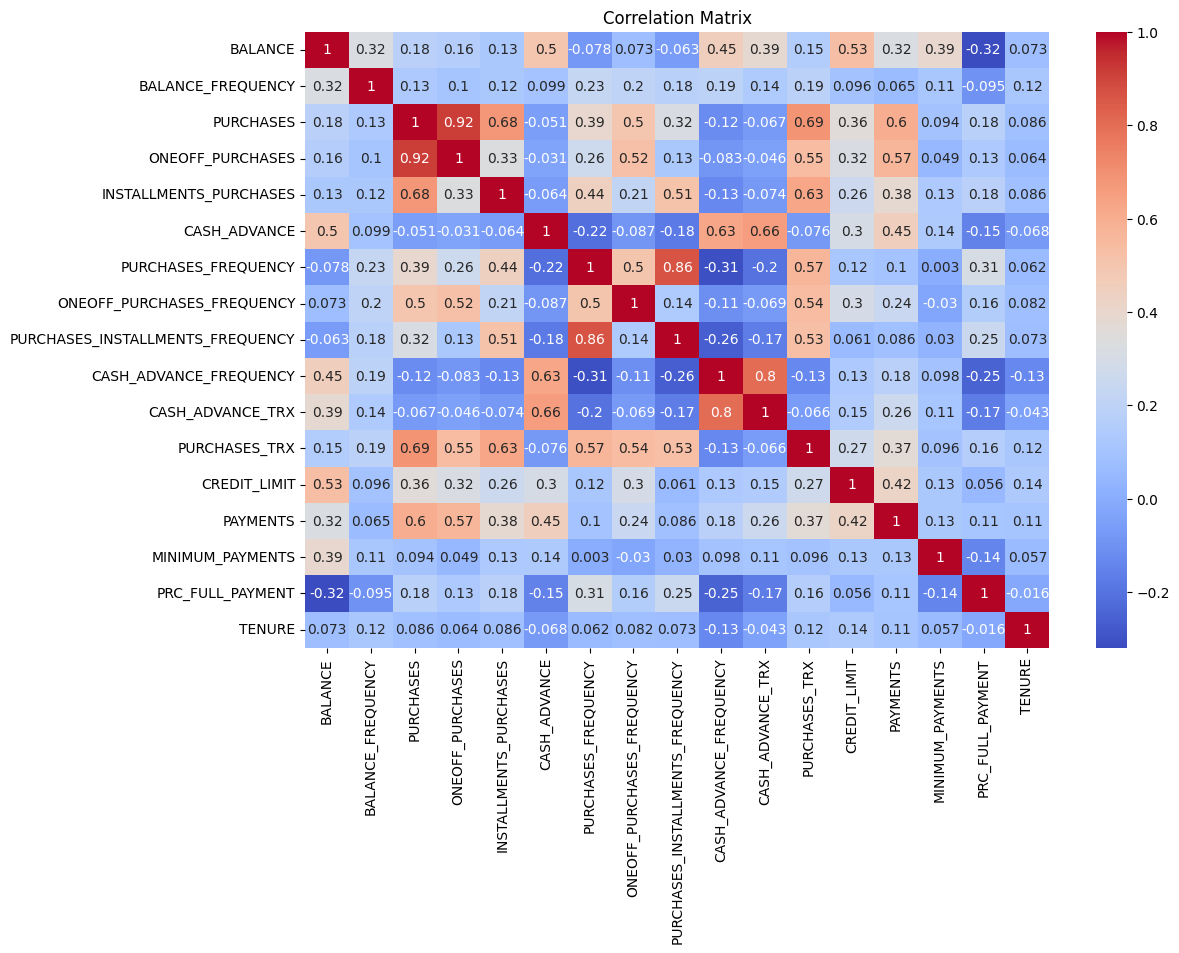

In [8]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
df.drop('CUST_ID', axis=1, inplace=True, errors='ignore')
#مش feature تفيد الموديل

In [10]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

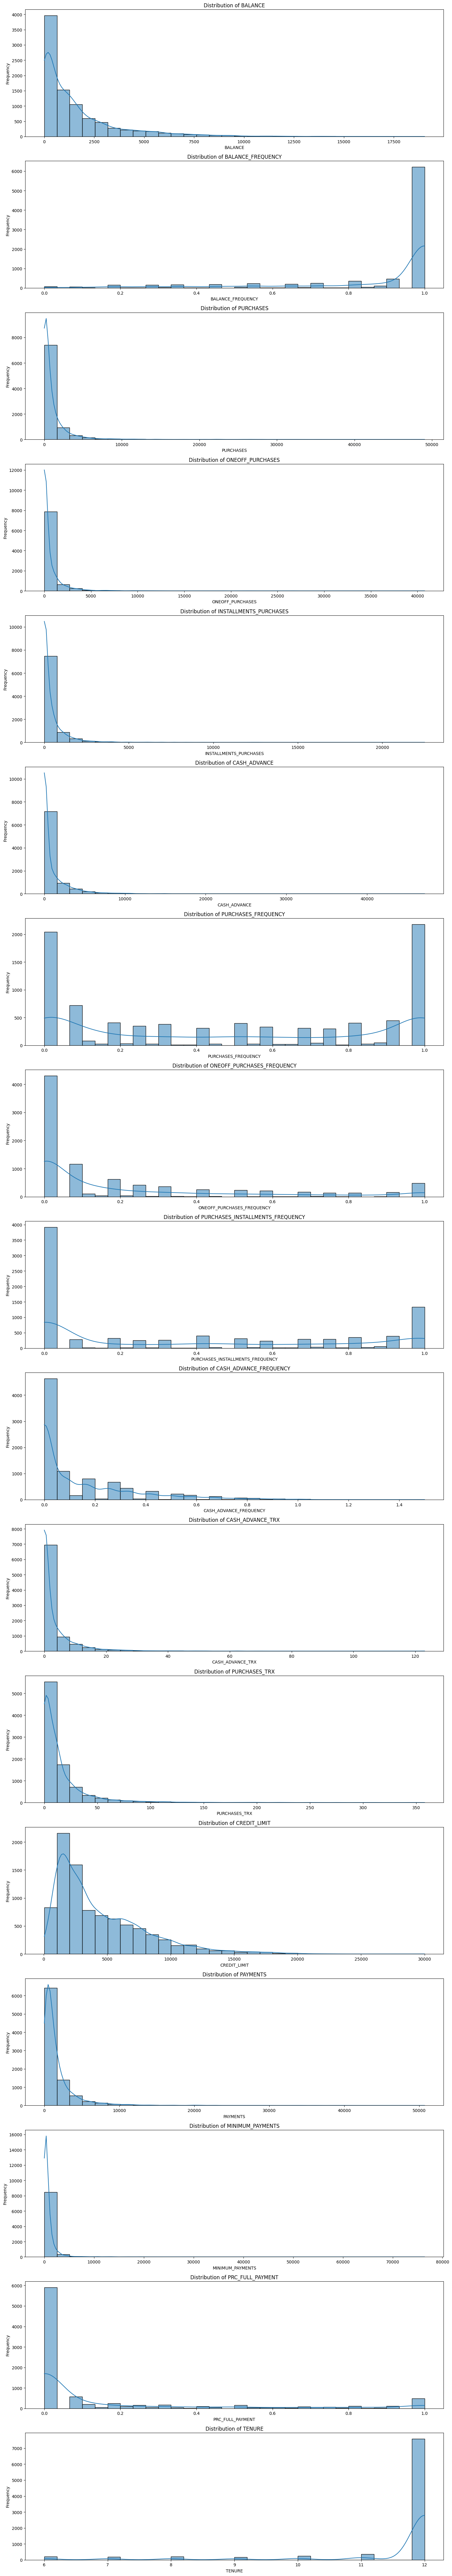

In [12]:
plt.figure(figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [13]:
zero_ratio = (df[num_cols] == 0).mean().sort_values(ascending=False)
zero_ratio

,0
PRC_FULL_PAYMENT,0.659553
CASH_ADVANCE_FREQUENCY,0.517095
CASH_ADVANCE,0.517095
CASH_ADVANCE_TRX,0.517095
ONEOFF_PURCHASES_FREQUENCY,0.480670
ONEOFF_PURCHASES,0.480670
INSTALLMENTS_PURCHASES,0.437542
PURCHASES_INSTALLMENTS_FREQUENCY,0.437430
PURCHASES,0.228380
PURCHASES_TRX,0.228380


In [14]:
df['TENURE'].value_counts()
df['MINIMUM_PAYMENTS'].value_counts()
df['CREDIT_LIMIT'].value_counts()

,count
CREDIT_LIMIT,
3000.000000,784
1500.000000,722
1200.000000,621
1000.000000,614
2500.000000,612
...,...
3777.777778,1
650.000000,1
1450.000000,1


In [15]:

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (df[num_cols] < lower) | (df[num_cols] > upper)

outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print("Number of outliers:")
print(outlier_counts[outlier_counts > 0])

cols_with_outliers = outlier_counts[outlier_counts > 0].index.tolist()
print("\nColumns that have outlier:", cols_with_outliers)

Number of outliers:
BALANCE_FREQUENCY             1493
PRC_FULL_PAYMENT              1474
TENURE                        1366
CASH_ADVANCE                  1030
ONEOFF_PURCHASES              1013
INSTALLMENTS_PURCHASES         867
PURCHASES                      808
PAYMENTS                       808
CASH_ADVANCE_TRX               804
ONEOFF_PURCHASES_FREQUENCY     782
MINIMUM_PAYMENTS               774
PURCHASES_TRX                  766
BALANCE                        695
CASH_ADVANCE_FREQUENCY         525
CREDIT_LIMIT                   248
dtype: int64

Columns that have outlier: ['BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE', 'CASH_ADVANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES', 'PAYMENTS', 'CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS', 'PURCHASES_TRX', 'BALANCE', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT']


In [16]:
num_cols = [
    'BALANCE',
    'CASH_ADVANCE',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS'
]


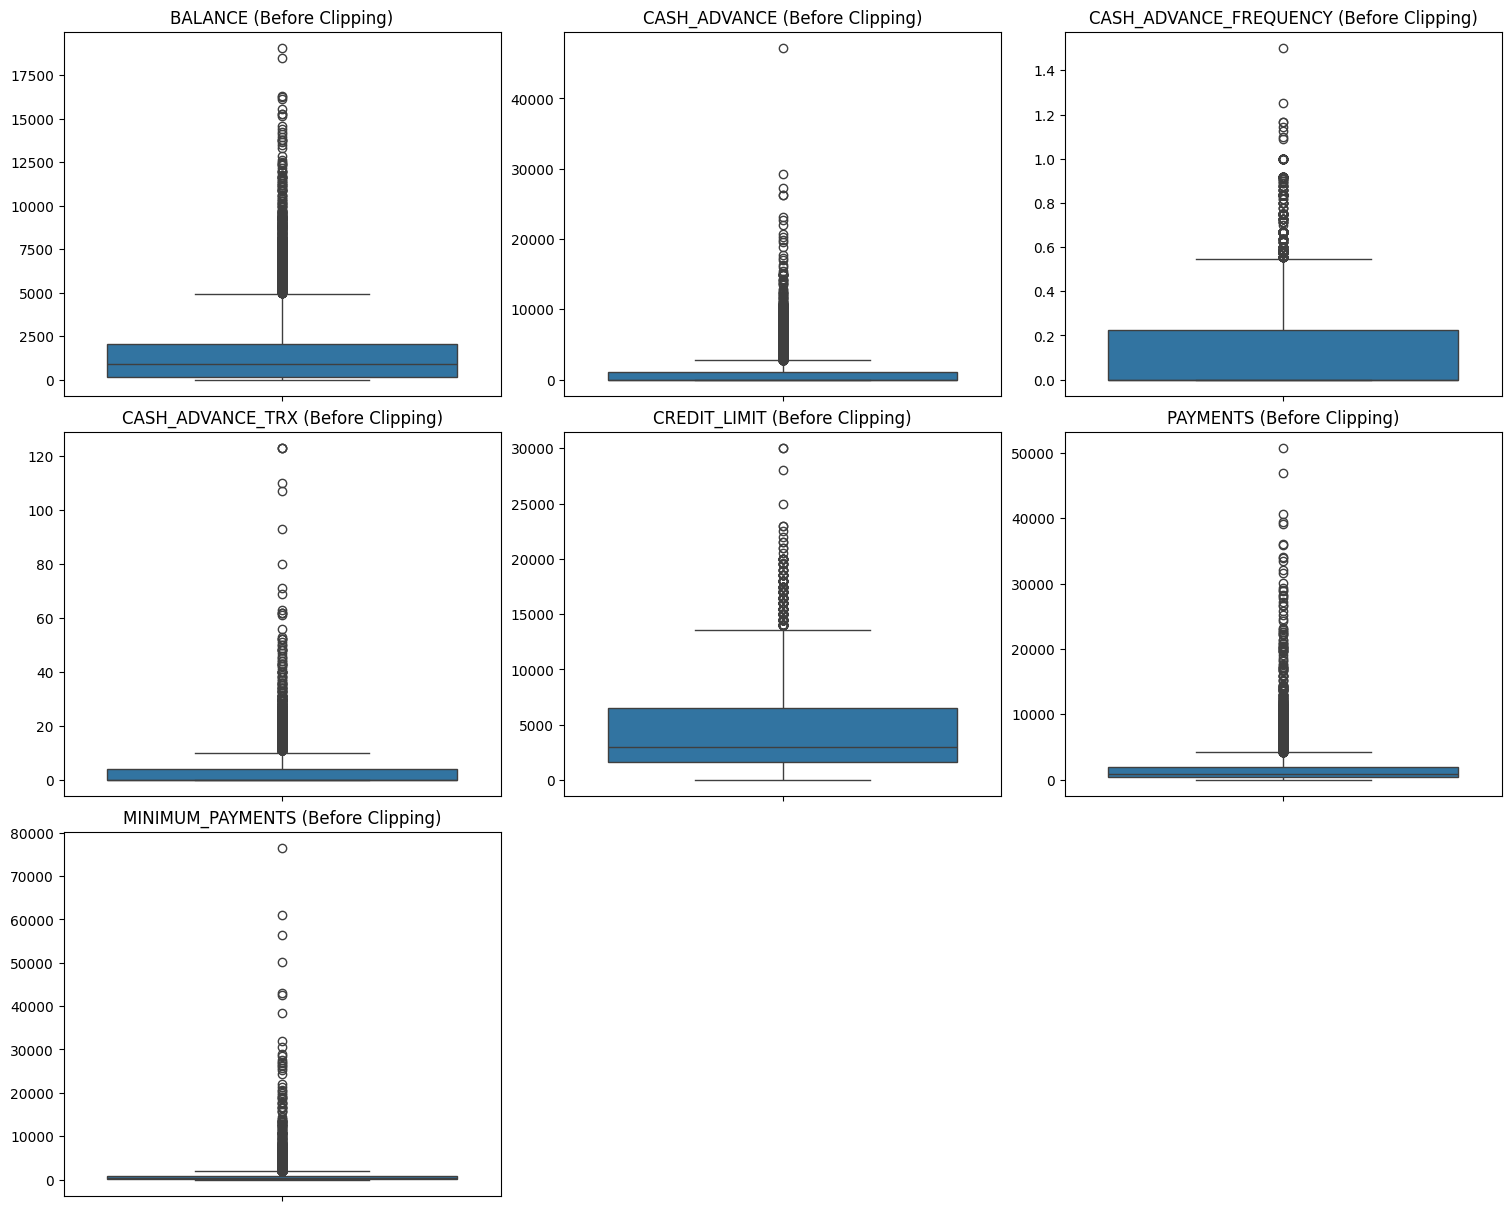

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

n = len(num_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(
    rows,
    cols,
    figsize=(5 * cols, 4 * rows),
    constrained_layout=True
)

axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f"{col} (Before Clipping)")
    ax.set_xlabel("")
    ax.set_ylabel("")

# إلغاء أي subplot فاضي
for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.show()


In [18]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
factor = 1.5
lower = Q1 - factor * IQR
upper = Q3 + factor * IQR

outlier_mask = (df[num_cols] < lower) | (df[num_cols] > upper)
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

cols_with_outliers = outlier_counts[outlier_counts > 0].index.tolist()

for col in cols_with_outliers:
    df[col] = np.where(df[col] > upper[col], upper[col], df[col])
    df[col] = np.where(df[col] < lower[col], lower[col], df[col])

Q1_after = df[num_cols].quantile(0.25)
Q3_after = df[num_cols].quantile(0.75)
IQR_after = Q3_after - Q1_after
lower_after = Q1_after - factor * IQR_after
upper_after = Q3_after + factor * IQR_after
outlier_mask_after = (df[num_cols] < lower_after) | (df[num_cols] > upper_after)
outlier_counts_after = outlier_mask_after.sum().sort_values(ascending=False)


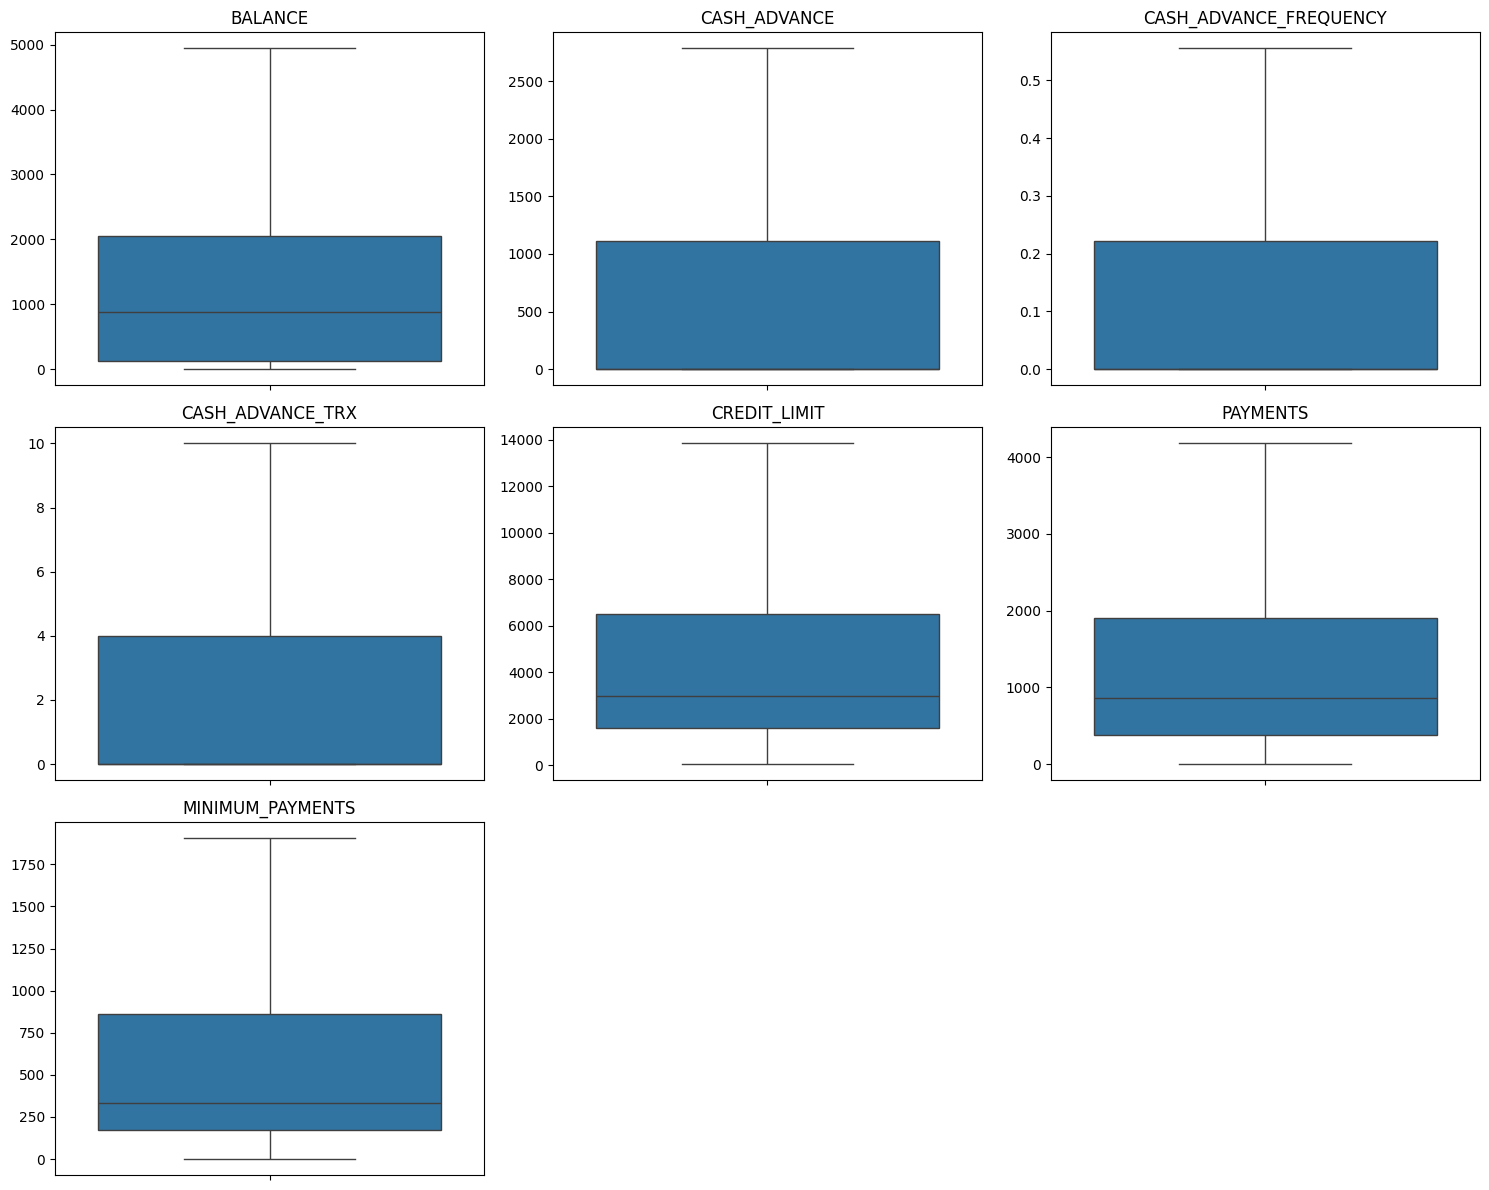

In [19]:
n = len(num_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [20]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
scaled_data

array([[-0.87782104, -0.24943448, -0.42489974, ..., -0.79404745,
        -0.52555097,  0.36067954],
       [ 1.1785459 ,  0.13432467, -0.46955188, ...,  0.83675109,
         0.2342269 ,  0.36067954],
       [ 0.71848713,  0.51808382, -0.10766823, ...,  0.05869355,
        -0.52555097,  0.36067954],
       ...,
       [-0.88920486, -0.18547673, -0.40196519, ..., -0.89385616,
         0.32919999, -4.12276757],
       [-0.89567082, -0.18547673, -0.46955188, ..., -0.94046866,
         0.32919999, -4.12276757],
       [-0.66200474, -0.88903307,  0.04214581, ..., -0.88359305,
        -0.52555097, -4.12276757]])

In [21]:
random_state_val = 0

In [22]:
wcss = []
silhouette_scores = []

print("\n Finding Optimal K using Elbow Method and Silhouette Score...")
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state_val, n_init=10)
    kmeans.fit(df)  # Use the fully numerical DataFrame
    wcss.append(kmeans.inertia_)

    if i > 1:
        score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"K={i}: Silhouette Score = {score:.4f}")


 Finding Optimal K using Elbow Method and Silhouette Score...
K=2: Silhouette Score = 0.4732
K=3: Silhouette Score = 0.4635
K=4: Silhouette Score = 0.3700
K=5: Silhouette Score = 0.3661
K=6: Silhouette Score = 0.3753
K=7: Silhouette Score = 0.3889
K=8: Silhouette Score = 0.3162
K=9: Silhouette Score = 0.3149
K=10: Silhouette Score = 0.2664


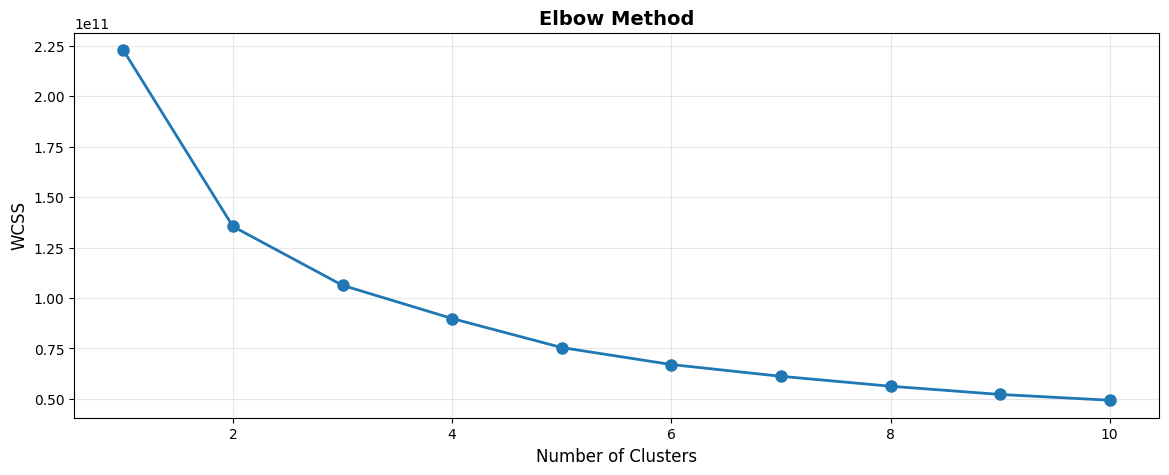

In [23]:
# Plot Elbow and Silhouette
plt.figure(figsize=(14, 5))
plt.plot(range(1, 11), wcss, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True, alpha=0.3)

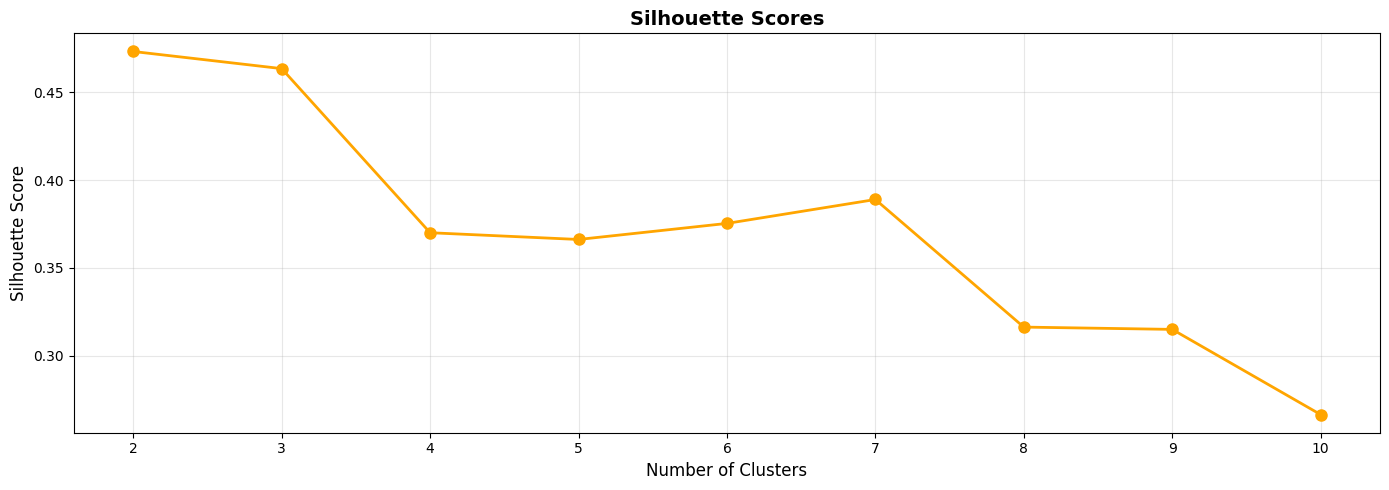

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange', linewidth=2, markersize=8)
plt.title('Silhouette Scores', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Choose best K based on silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f" Best K selected: {best_k} (Highest Silhouette Score: {max(silhouette_scores):.4f})")

 Best K selected: 2 (Highest Silhouette Score: 0.4732)


In [26]:
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=random_state_val, n_init=10)

In [27]:
kmeans_final.fit(scaled_data)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [28]:
labels = kmeans_final.labels_
labels

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [30]:
if 'best_k' not in locals():
    best_k = 5

print(f"Retraining K-Means on data with shape: {df.shape}...")
cluster_labels = kmeans_final.fit_predict(df)


Retraining K-Means on data with shape: (8950, 17)...


In [31]:
sil = silhouette_score(df, cluster_labels)
db = davies_bouldin_score(df, cluster_labels)
ch = calinski_harabasz_score(df, cluster_labels)
print("\n" + "="*60)
print("K-Means Final Metrics")
print("="*60)
print(f"Silhouette Score:        {sil:.4f}")
print(f"Davies-Bouldin Score:    {db:.4f} (lower is better)")
print(f"Calinski-Harabasz Score: {ch:.2f} (higher is better)")
print("="*60)


K-Means Final Metrics
Silhouette Score:        0.4732
Davies-Bouldin Score:    1.0418 (lower is better)
Calinski-Harabasz Score: 5771.76 (higher is better)


In [32]:
df['Cluster_KMeans'] = cluster_labels


PCA Component 1 explains: 56.99% of variance
PCA Component 2 explains: 24.09% of variance
Total variance explained: 81.08%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


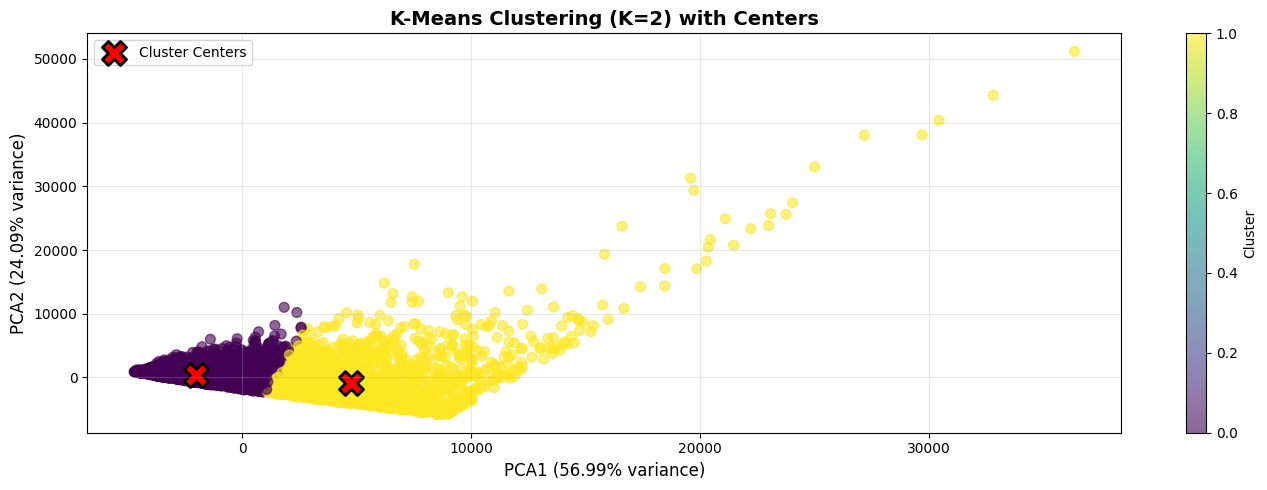

In [33]:
pca = PCA(n_components=2, random_state=random_state_val)

# Create a DataFrame for PCA without the 'Cluster_KMeans' column
df_for_pca = df.drop('Cluster_KMeans', axis=1)

pca_components = pca.fit_transform(df_for_pca)

print(f"\nPCA Component 1 explains: {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"PCA Component 2 explains: {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels


centers_pca = pca.transform(kmeans_final.cluster_centers_)

plt.figure(figsize=(14, 5))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
                      c=pca_df['Cluster'],
                      cmap='viridis',
                      s=50,
                      alpha=0.6)

plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='red',
            marker='X',
            s=300,
            edgecolors='black',
            linewidth=2,
            label='Cluster Centers')

plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
plt.title(f'K-Means Clustering (K={best_k}) with Centers', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
print("\n" + "="*70)
print(" K-MEANS CLUSTER INTERPRETATION")
print("="*70)

cluster_summary = df.groupby('Cluster_KMeans')[num_cols].mean().round(2)
print("\nAverage values per cluster:")
print(cluster_summary)

type_cols = [c for c in df.columns if 'status_type' in c]
if type_cols:
    type_summary = df.groupby('Cluster_KMeans')[type_cols].mean().round(2)
    print("\n Post Type Distribution per Cluster:")
    print(type_summary)


cluster_sizes = df['Cluster_KMeans'].value_counts().sort_index()
print("\n Cluster Sizes:")
print(cluster_sizes)

print("\n Business Insight:")
print("Based on the metrics above, interpret each cluster:")
print("Example:")
print("  - Cluster 0: High engagement posts (viral content)")
print("  - Cluster 1: Medium engagement (regular posts)")
print("  - Cluster 2: Low engagement (less popular content)")
print("(Adjust interpretation based on your actual numbers)")


 K-MEANS CLUSTER INTERPRETATION

Average values per cluster:
                BALANCE  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
Cluster_KMeans                                                  
0                886.00        499.38                    0.11   
1               2597.67       1086.62                    0.17   

                CASH_ADVANCE_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  
Cluster_KMeans                                                              
0                           2.00       2594.97    966.43            468.50  
1                           3.29       8784.43   2257.88            893.31  

 Cluster Sizes:
Cluster_KMeans
0    6312
1    2638
Name: count, dtype: int64

 Business Insight:
Based on the metrics above, interpret each cluster:
Example:
  - Cluster 0: High engagement posts (viral content)
  - Cluster 1: Medium engagement (regular posts)
  - Cluster 2: Low engagement (less popular content)
(Adjust interpretation based on your actual numbers)


In [35]:
df.shape

(8950, 18)

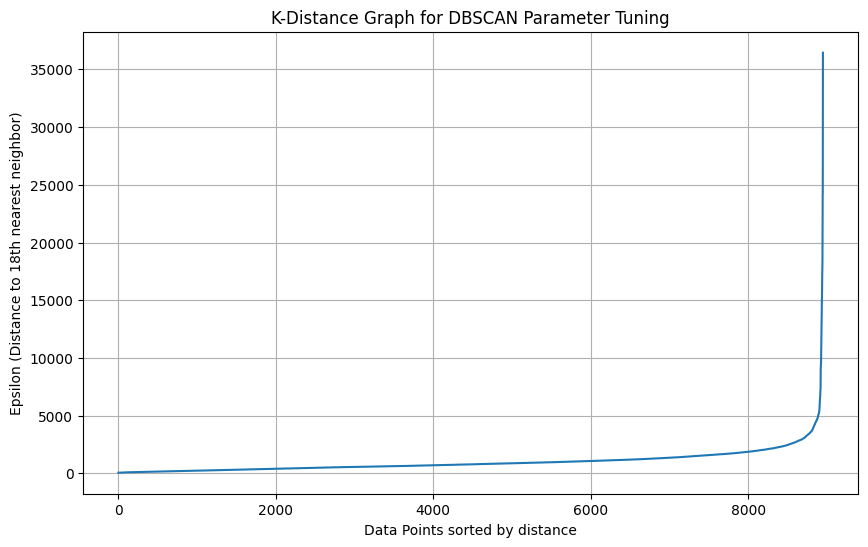

Suggested min_samples: 18
Look at the 'Elbow' in the chart above to pick the optimal eps value.


In [36]:
from sklearn.neighbors import NearestNeighbors
min_samples = df.shape[1]

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN Parameter Tuning')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Epsilon (Distance to {min_samples}th nearest neighbor)')
plt.grid(True)
plt.show()

print(f"Suggested min_samples: {min_samples}")
print("Look at the 'Elbow' in the chart above to pick the optimal eps value.")

In [37]:
!pip install kneed

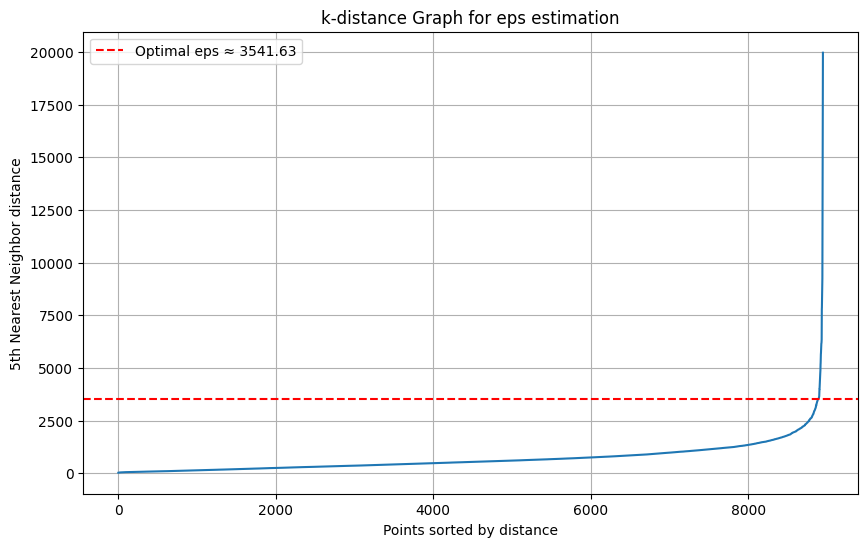

In [38]:

def find_optimal_eps(X, k=5):
    """
    Find optimal eps parameter using k-distance graph
    k = min_samples - 1 (usually)
    """
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    # Sort distances
    distances = np.sort(distances[:, k-1], axis=0)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}th Nearest Neighbor distance')
    plt.title('k-distance Graph for eps estimation')
    plt.grid(True)

    # Find "elbow" point programmatically
    # Method 1: Maximum curvature
    from kneed import KneeLocator
    kneedle = KneeLocator(range(len(distances)), distances,
                         curve='convex', direction='increasing')

    if kneedle.elbow:
        optimal_eps = distances[kneedle.elbow]
        plt.axhline(y=optimal_eps, color='r', linestyle='--',
                   label=f'Optimal eps ≈ {optimal_eps:.2f}')
        plt.legend()

    plt.show()

    return distances

# Usage
distances = find_optimal_eps(df, k=5)


In [39]:
for eps in [0.8, 1.0, 1.2]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(scaled_data)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} → clusters={n_clusters}")


eps=0.8 → clusters=31
eps=1.0 → clusters=17
eps=1.2 → clusters=22


In [40]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Clusters:", n_clusters)
print("Noise points:", n_noise)

Clusters: 22
Noise points: 2722


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(pca_data)


In [42]:
db_labels = dbscan.fit_predict(pca_data)
db_labels

array([ 0,  0,  0, ...,  0, -1, -1])


PCA Component 1 explains: 56.99% of variance
PCA Component 2 explains: 24.09% of variance
Total variance explained: 81.08%


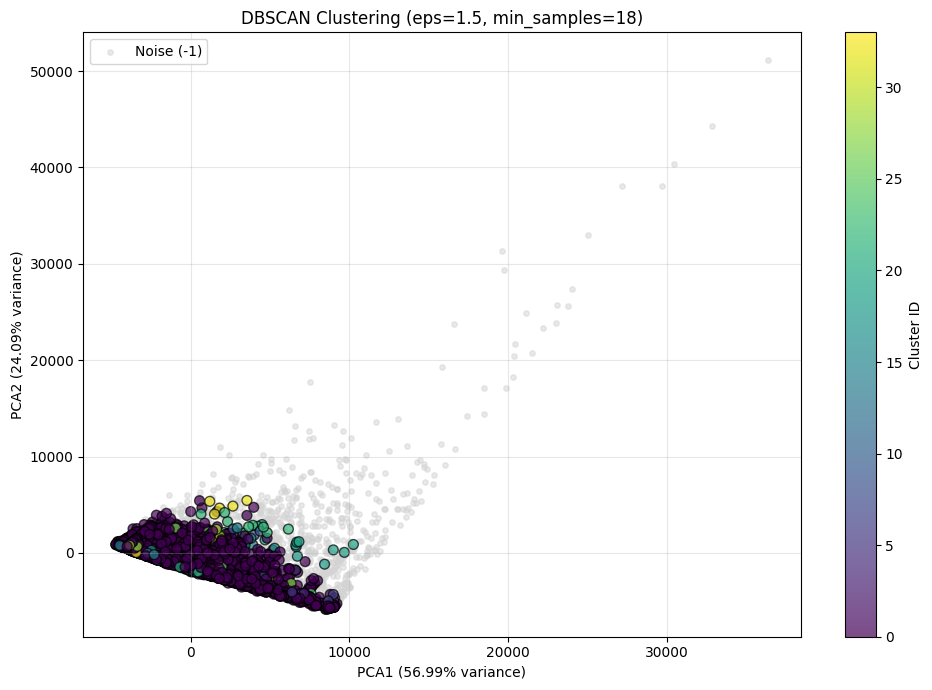


 DBSCAN Cluster Characteristics (Mean Values):
DB_Cluster                            -1        0        1        2   \
BALANCE                           1954.54  1139.68  4811.23    22.84   
BALANCE_FREQUENCY                    0.88     0.88     1.00     0.14   
PURCHASES                         2324.76   426.80   566.32   107.54   
ONEOFF_PURCHASES                  1480.91   204.52   122.86    90.55   
INSTALLMENTS_PURCHASES             844.12   222.61   443.46    16.99   
CASH_ADVANCE                       972.86   540.43  1550.09   223.71   
PURCHASES_FREQUENCY                  0.67     0.41     0.90     0.09   
ONEOFF_PURCHASES_FREQUENCY           0.38     0.12     0.03     0.08   
PURCHASES_INSTALLMENTS_FREQUENCY     0.48     0.31     0.86     0.03   
CASH_ADVANCE_FREQUENCY               0.16     0.11     0.20     0.06   
CASH_ADVANCE_TRX                     3.18     2.04     3.88     0.66   
PURCHASES_TRX                       29.31     8.26    18.75     1.16   
CREDIT_LIMIT    

In [43]:
pca = PCA(n_components=2, random_state=random_state_val) # Use 2 components for 2D visualization
# Select only the numerical features from df for PCA, excluding the cluster labels
features_for_pca = df.drop(columns=['Cluster_KMeans', 'DB_Cluster'], errors='ignore',axis=1)
pca_components = pca.fit_transform(features_for_pca)

print(f"\nPCA Component 1 explains: {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"PCA Component 2 explains: {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

pca_df_db = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df_db['Cluster'] = db_labels # Use db_labels for DBSCAN clusters


plt.figure(figsize=(10, 7))

# Separate noise and clustered data in the PCA-transformed DataFrame
noise_data_pca = pca_df_db[pca_df_db['Cluster'] == -1]
clustered_data_pca = pca_df_db[pca_df_db['Cluster'] != -1]

# Plot noise points
plt.scatter(noise_data_pca['PCA1'], noise_data_pca['PCA2'],
            c='lightgrey', label='Noise (-1)', s=15, alpha=0.5)

# Plot clustered data
scatter = plt.scatter(clustered_data_pca['PCA1'], clustered_data_pca['PCA2'],
                      c=clustered_data_pca['Cluster'], cmap='viridis', s=50, edgecolors='k', alpha=0.7)

plt.colorbar(scatter, label='Cluster ID')
plt.title(f'DBSCAN Clustering (eps=1.5, min_samples={min_samples})') # Use actual eps from previous cell
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Add DB_Cluster column to df for interpretation
df['DB_Cluster'] = db_labels

# Re-calculate n_clusters just in case (though it should be 0 based on previous run)
n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)

if n_clusters_db > 0: # Corrected n_clusters_ to n_clusters_db
    print("\n DBSCAN Cluster Characteristics (Mean Values):")
    # Need to group by DB_Cluster which is now in X (or df)
    # Exclude the KMeans cluster column when profiling DBSCAN clusters
    profile_db = df.groupby('DB_Cluster').mean(numeric_only=True).round(2).T # Corrected df_clusters to df
    print(profile_db)